In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))
pd.set_option("display.max_rows", 1000)
pd.set_option("display.max_columns",1000)

# Any results you write to the current directory are saved as output.

['train.csv', 'test.csv', 'sample_submission.csv']


In [2]:
train_df=pd.read_csv('../input/train.csv')
test_df=pd.read_csv('../input/test.csv')

In [3]:
train_df.head()

,id,muggy-smalt-axolotl-pembus,dorky-peach-sheepdog-ordinal,slimy-seashell-cassowary-goose,snazzy-harlequin-chicken-distraction,frumpy-smalt-mau-ordinal,stealthy-beige-pinscher-golden,chummy-cream-tarantula-entropy,hazy-emerald-cuttlefish-unsorted,nerdy-indigo-wolfhound-sorted,leaky-amaranth-lizard-sorted,ugly-tangerine-chihuahua-important,shaggy-silver-indri-fimbus,flaky-chocolate-beetle-grandmaster,squirrely-harlequin-sheep-sumble,freaky-tan-angelfish-noise,lousy-plum-penguin-sumble,bluesy-rose-wallaby-discard,baggy-copper-oriole-dummy,stealthy-scarlet-hound-fepid,greasy-cinnamon-bonobo-contributor,cranky-cardinal-dogfish-ordinal,snippy-auburn-vole-learn,greasy-sepia-coral-dataset,flabby-tangerine-fowl-entropy,lousy-smalt-pinscher-dummy,bluesy-brass-chihuahua-distraction,goopy-eggplant-indri-entropy,homey-sepia-bombay-sorted,homely-ruby-bulldog-entropy,hasty-blue-sheep-contributor,blurry-wisteria-oyster-master,snoopy-auburn-dogfish-expert,stinky-maroon-blue-kernel,bumpy-amaranth-armadillo-important,slaphappy-peach-oyster-master,dorky-tomato-ragdoll-dataset,messy-mauve-wolverine-ordinal,geeky-pumpkin-moorhen-important,crabby-teal-otter-unsorted,flaky-goldenrod-bat-noise,beady-aquamarine-affenpinscher-grandmaster,pasty-auburn-rat-entropy,snappy-gamboge-caterpillar-dummy,breezy-persimmon-newt-noise,baggy-mustard-collie-hint,sunny-red-weasel-hint,cheeky-red-armadillo-unsorted,wiggy-magnolia-wolfhound-sorted,flimsy-chestnut-guppy-important,beady-champagne-bullfrog-grandmaster,lanky-emerald-alligator-kernel,blurry-flax-sloth-fepid,scanty-viridian-guppy-grandmaster,blurry-amber-moth-dataset,grumpy-zucchini-kudu-kernel,chewy-myrtle-wasp-important,snappy-lemon-okapi-ordinal,cranky-eggplant-oyster-sumble,snappy-pear-quoll-unsorted,crappy-cream-shrew-unsorted,bluesy-amber-walrus-fepid,clammy-xanthic-affenpinscher-golden,slimy-blue-alligator-master,hazy-tan-schnauzer-hint,breezy-aquamarine-sloth-sorted,tasty-indigo-termite-ordinal,thirsty-gamboge-dragonfly-kernel,gloppy-turquoise-quoll-goose,gamy-lilac-kakapo-expert,geeky-amethyst-quetzal-unsorted,hilly-lime-vole-novice,baggy-champagne-capuchin-discard,dorky-amaranth-eel-grandmaster,hasty-pink-iguana-noise,snoopy-red-zonkey-unsorted,tasty-periwinkle-fousek-unsorted,homey-scarlet-javanese-novice,woozy-crimson-beetle-contributor,snippy-burgundy-leopard-expert,slimy-purple-gorilla-goose,snappy-brass-malamute-entropy,greasy-rust-birman-kernel,goopy-copper-fousek-distraction,snazzy-cerise-donkey-distraction,squeaky-khaki-lionfish-distraction,snazzy-malachite-llama-unsorted,nerdy-violet-rat-pembus,clammy-scarlet-emu-important,lovely-sangria-koala-contributor,blurry-sangria-saola-gaussian,paltry-seashell-neanderthal-master,crappy-pumpkin-saola-grandmaster,smelly-tangerine-horse-gaussian,cranky-magenta-mammoth-distraction,hazy-champagne-duck-entropy,flaky-cream-peccary-sorted,pokey-russet-hippopotamus-master,leaky-apricot-mammoth-unsorted,flaky-brass-grasshopper-sorted,skanky-cobalt-dolphin-sorted,zippy-platinum-gharial-kernel,sleazy-cinnamon-frog-grandmaster,gloppy-denim-ostrich-gaussian,smelly-yellow-akbash-important,shaggy-sapphire-eel-unsorted,queasy-peach-bison-sumble,foggy-denim-hyrax-important,grumpy-bronze-capybara-sumble,ugly-green-earwig-noise,slimy-thistle-cuscus-hint,chummy-ruby-chinook-dataset,cranky-champagne-jackal-gaussian,lousy-wisteria-hornet-entropy,wheezy-harlequin-earwig-gaussian,tasty-buff-monkey-learn,droopy-razzmatazz-bordeaux-dummy,cozy-khaki-reindeer-golden,greasy-crimson-squid-grandmaster,dorky-turquoise-maltese-important,lousy-blue-buffalo-entropy,skinny-yellow-hedgehog-sumble,pasty-flax-octopus-dataset,pasty-sepia-eel-noise,seedy-charcoal-capybara-ordinal,cranky-ultramarine-swan-pembus,hasty-puce-fowl-fepid,sunny-purple-husky-noise,stuffy-periwinkle-zebu-discard,nerdy-teal-olm-fepid,jumpy-blue-bison-sorted,wiggy-denim-retriever-distraction,messy-cardinal-lemur-distraction,scanty-periwinkle-dhole-dataset,snazzy-purple-donkey-discard,skanky-carmine-rabbit-contributor,

Checking for missing values

In [4]:
train_df.isnull().sum().sum()

0

In [5]:
test_df.isnull().sum().sum()

0

Exploring the data a bit..

In [6]:
train_df.describe()

,muggy-smalt-axolotl-pembus,dorky-peach-sheepdog-ordinal,slimy-seashell-cassowary-goose,snazzy-harlequin-chicken-distraction,frumpy-smalt-mau-ordinal,stealthy-beige-pinscher-golden,chummy-cream-tarantula-entropy,hazy-emerald-cuttlefish-unsorted,nerdy-indigo-wolfhound-sorted,leaky-amaranth-lizard-sorted,ugly-tangerine-chihuahua-important,shaggy-silver-indri-fimbus,flaky-chocolate-beetle-grandmaster,squirrely-harlequin-sheep-sumble,freaky-tan-angelfish-noise,lousy-plum-penguin-sumble,bluesy-rose-wallaby-discard,baggy-copper-oriole-dummy,stealthy-scarlet-hound-fepid,greasy-cinnamon-bonobo-contributor,cranky-cardinal-dogfish-ordinal,snippy-auburn-vole-learn,greasy-sepia-coral-dataset,flabby-tangerine-fowl-entropy,lousy-smalt-pinscher-dummy,bluesy-brass-chihuahua-distraction,goopy-eggplant-indri-entropy,homey-sepia-bombay-sorted,homely-ruby-bulldog-entropy,hasty-blue-sheep-contributor,blurry-wisteria-oyster-master,snoopy-auburn-dogfish-expert,stinky-maroon-blue-kernel,bumpy-amaranth-armadillo-important,slaphappy-peach-oyster-master,dorky-tomato-ragdoll-dataset,messy-mauve-wolverine-ordinal,geeky-pumpkin-moorhen-important,crabby-teal-otter-unsorted,flaky-goldenrod-bat-noise,beady-aquamarine-affenpinscher-grandmaster,pasty-auburn-rat-entropy,snappy-gamboge-caterpillar-dummy,breezy-persimmon-newt-noise,baggy-mustard-collie-hint,sunny-red-weasel-hint,cheeky-red-armadillo-unsorted,wiggy-magnolia-wolfhound-sorted,flimsy-chestnut-guppy-important,beady-champagne-bullfrog-grandmaster,lanky-emerald-alligator-kernel,blurry-flax-sloth-fepid,scanty-viridian-guppy-grandmaster,blurry-amber-moth-dataset,grumpy-zucchini-kudu-kernel,chewy-myrtle-wasp-important,snappy-lemon-okapi-ordinal,cranky-eggplant-oyster-sumble,snappy-pear-quoll-unsorted,crappy-cream-shrew-unsorted,bluesy-amber-walrus-fepid,clammy-xanthic-affenpinscher-golden,slimy-blue-alligator-master,hazy-tan-schnauzer-hint,breezy-aquamarine-sloth-sorted,tasty-indigo-termite-ordinal,thirsty-gamboge-dragonfly-kernel,gloppy-turquoise-quoll-goose,gamy-lilac-kakapo-expert,geeky-amethyst-quetzal-unsorted,hilly-lime-vole-novice,baggy-champagne-capuchin-discard,dorky-amaranth-eel-grandmaster,hasty-pink-iguana-noise,snoopy-red-zonkey-unsorted,tasty-periwinkle-fousek-unsorted,homey-scarlet-javanese-novice,woozy-crimson-beetle-contributor,snippy-burgundy-leopard-expert,slimy-purple-gorilla-goose,snappy-brass-malamute-entropy,greasy-rust-birman-kernel,goopy-copper-fousek-distraction,snazzy-cerise-donkey-distraction,squeaky-khaki-lionfish-distraction,snazzy-malachite-llama-unsorted,nerdy-violet-rat-pembus,clammy-scarlet-emu-important,lovely-sangria-koala-contributor,blurry-sangria-saola-gaussian,paltry-seashell-neanderthal-master,crappy-pumpkin-saola-grandmaster,smelly-tangerine-horse-gaussian,cranky-magenta-mammoth-distraction,hazy-champagne-duck-entropy,flaky-cream-peccary-sorted,pokey-russet-hippopotamus-master,leaky-apricot-mammoth-unsorted,flaky-brass-grasshopper-sorted,skanky-cobalt-dolphin-sorted,zippy-platinum-gharial-kernel,sleazy-cinnamon-frog-grandmaster,gloppy-denim-ostrich-gaussian,smelly-yellow-akbash-important,shaggy-sapphire-eel-unsorted,queasy-peach-bison-sumble,foggy-denim-hyrax-important,grumpy-bronze-capybara-sumble,ugly-green-earwig-noise,slimy-thistle-cuscus-hint,chummy-ruby-chinook-dataset,cranky-champagne-jackal-gaussian,lousy-wisteria-hornet-entropy,wheezy-harlequin-earwig-gaussian,tasty-buff-monkey-learn,droopy-razzmatazz-bordeaux-dummy,cozy-khaki-reindeer-golden,greasy-crimson-squid-grandmaster,dorky-turquoise-maltese-important,lousy-blue-buffalo-entropy,skinny-yellow-hedgehog-sumble,pasty-flax-octopus-dataset,pasty-sepia-eel-noise,seedy-charcoal-capybara-ordinal,cranky-ultramarine-swan-pembus,hasty-puce-fowl-fepid,sunny-purple-husky-noise,stuffy-periwinkle-zebu-discard,nerdy-teal-olm-fepid,jumpy-blue-bison-sorted,wiggy-denim-retriever-distraction,messy-cardinal-lemur-distraction,scanty-periwinkle-dhole-dataset,snazzy-purple-donkey-discard,skanky-carmine-rabbit-contributor,whe

In [7]:
test_df.describe()

,muggy-smalt-axolotl-pembus,dorky-peach-sheepdog-ordinal,slimy-seashell-cassowary-goose,snazzy-harlequin-chicken-distraction,frumpy-smalt-mau-ordinal,stealthy-beige-pinscher-golden,chummy-cream-tarantula-entropy,hazy-emerald-cuttlefish-unsorted,nerdy-indigo-wolfhound-sorted,leaky-amaranth-lizard-sorted,ugly-tangerine-chihuahua-important,shaggy-silver-indri-fimbus,flaky-chocolate-beetle-grandmaster,squirrely-harlequin-sheep-sumble,freaky-tan-angelfish-noise,lousy-plum-penguin-sumble,bluesy-rose-wallaby-discard,baggy-copper-oriole-dummy,stealthy-scarlet-hound-fepid,greasy-cinnamon-bonobo-contributor,cranky-cardinal-dogfish-ordinal,snippy-auburn-vole-learn,greasy-sepia-coral-dataset,flabby-tangerine-fowl-entropy,lousy-smalt-pinscher-dummy,bluesy-brass-chihuahua-distraction,goopy-eggplant-indri-entropy,homey-sepia-bombay-sorted,homely-ruby-bulldog-entropy,hasty-blue-sheep-contributor,blurry-wisteria-oyster-master,snoopy-auburn-dogfish-expert,stinky-maroon-blue-kernel,bumpy-amaranth-armadillo-important,slaphappy-peach-oyster-master,dorky-tomato-ragdoll-dataset,messy-mauve-wolverine-ordinal,geeky-pumpkin-moorhen-important,crabby-teal-otter-unsorted,flaky-goldenrod-bat-noise,beady-aquamarine-affenpinscher-grandmaster,pasty-auburn-rat-entropy,snappy-gamboge-caterpillar-dummy,breezy-persimmon-newt-noise,baggy-mustard-collie-hint,sunny-red-weasel-hint,cheeky-red-armadillo-unsorted,wiggy-magnolia-wolfhound-sorted,flimsy-chestnut-guppy-important,beady-champagne-bullfrog-grandmaster,lanky-emerald-alligator-kernel,blurry-flax-sloth-fepid,scanty-viridian-guppy-grandmaster,blurry-amber-moth-dataset,grumpy-zucchini-kudu-kernel,chewy-myrtle-wasp-important,snappy-lemon-okapi-ordinal,cranky-eggplant-oyster-sumble,snappy-pear-quoll-unsorted,crappy-cream-shrew-unsorted,bluesy-amber-walrus-fepid,clammy-xanthic-affenpinscher-golden,slimy-blue-alligator-master,hazy-tan-schnauzer-hint,breezy-aquamarine-sloth-sorted,tasty-indigo-termite-ordinal,thirsty-gamboge-dragonfly-kernel,gloppy-turquoise-quoll-goose,gamy-lilac-kakapo-expert,geeky-amethyst-quetzal-unsorted,hilly-lime-vole-novice,baggy-champagne-capuchin-discard,dorky-amaranth-eel-grandmaster,hasty-pink-iguana-noise,snoopy-red-zonkey-unsorted,tasty-periwinkle-fousek-unsorted,homey-scarlet-javanese-novice,woozy-crimson-beetle-contributor,snippy-burgundy-leopard-expert,slimy-purple-gorilla-goose,snappy-brass-malamute-entropy,greasy-rust-birman-kernel,goopy-copper-fousek-distraction,snazzy-cerise-donkey-distraction,squeaky-khaki-lionfish-distraction,snazzy-malachite-llama-unsorted,nerdy-violet-rat-pembus,clammy-scarlet-emu-important,lovely-sangria-koala-contributor,blurry-sangria-saola-gaussian,paltry-seashell-neanderthal-master,crappy-pumpkin-saola-grandmaster,smelly-tangerine-horse-gaussian,cranky-magenta-mammoth-distraction,hazy-champagne-duck-entropy,flaky-cream-peccary-sorted,pokey-russet-hippopotamus-master,leaky-apricot-mammoth-unsorted,flaky-brass-grasshopper-sorted,skanky-cobalt-dolphin-sorted,zippy-platinum-gharial-kernel,sleazy-cinnamon-frog-grandmaster,gloppy-denim-ostrich-gaussian,smelly-yellow-akbash-important,shaggy-sapphire-eel-unsorted,queasy-peach-bison-sumble,foggy-denim-hyrax-important,grumpy-bronze-capybara-sumble,ugly-green-earwig-noise,slimy-thistle-cuscus-hint,chummy-ruby-chinook-dataset,cranky-champagne-jackal-gaussian,lousy-wisteria-hornet-entropy,wheezy-harlequin-earwig-gaussian,tasty-buff-monkey-learn,droopy-razzmatazz-bordeaux-dummy,cozy-khaki-reindeer-golden,greasy-crimson-squid-grandmaster,dorky-turquoise-maltese-important,lousy-blue-buffalo-entropy,skinny-yellow-hedgehog-sumble,pasty-flax-octopus-dataset,pasty-sepia-eel-noise,seedy-charcoal-capybara-ordinal,cranky-ultramarine-swan-pembus,hasty-puce-fowl-fepid,sunny-purple-husky-noise,stuffy-periwinkle-zebu-discard,nerdy-teal-olm-fepid,jumpy-blue-bison-sorted,wiggy-denim-retriever-distraction,messy-cardinal-lemur-distraction,scanty-periwinkle-dhole-dataset,snazzy-purple-donkey-discard,skanky-carmine-rabbit-contributor,whe

In [8]:
train_df['target'].value_counts()

1    131131
0    131013
Name: target, dtype: int64

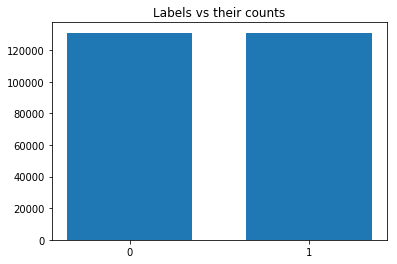

In [9]:
#visualizing class counts
from matplotlib import pyplot as plt
plt.hist(train_df['target'],bins=[-0.5,0.5,1.5],rwidth=0.7)
plt.xticks([0,1])
plt.title('Labels vs their counts')
plt.show()

In [10]:
#looking for any abnormal column, mean of all the 
train_df.describe().loc['mean'].max()

255.60248565673828

In [11]:
train_df.describe().loc['mean'].idxmax(axis=0)

'wheezy-copper-turtle-magic'

In [12]:
train_df['wheezy-copper-turtle-magic'].value_counts()

51     570
489    556
298    554
135    554
245    553
50     551
180    547
104    546
126    545
86     545
335    544
299    543
61     543
311    543
76     542
373    541
391    540
441    540
64     539
268    539
452    539
41     539
150    538
3      538
460    538
22     537
444    537
28     537
250    536
367    536
237    536
434    536
427    536
227    535
442    535
365    535
383    535
177    534
183    534
0      534
205    534
397    534
317    533
151    533
400    533
326    533
487    533
482    533
506    533
173    532
21     532
492    532
301    532
275    532
69     532
494    532
225    532
359    531
285    531
392    531
145    531
470    531
260    531
366    531
361    531
186    531
242    530
314    530
438    530
120    530
370    530
48     530
111    530
429    530
319    529
448    529
302    529
396    528
473    528
238    528
419    528
9      528
33     528
65     527
341    527
100    527
350    527
103    527
38     527
409    527
171    527

In [13]:
train_df['wheezy-copper-turtle-magic'].max()

511

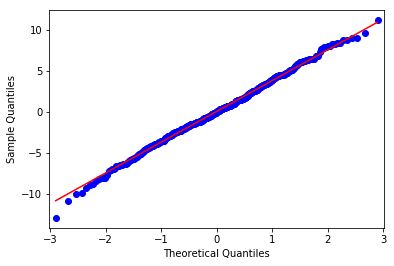

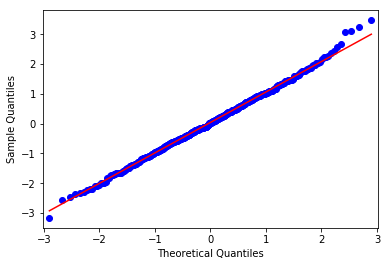

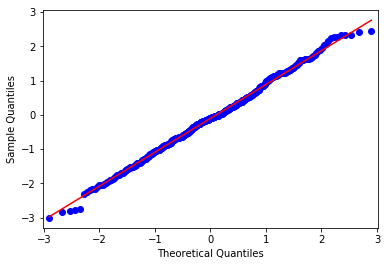

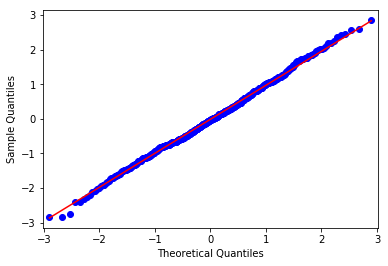

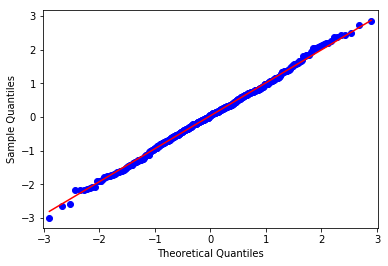

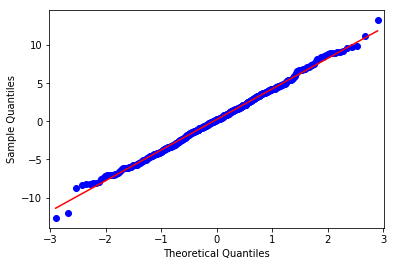

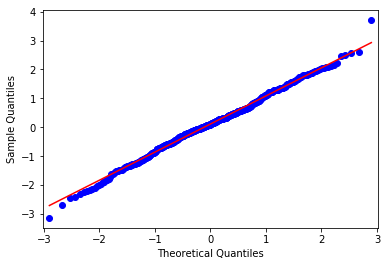

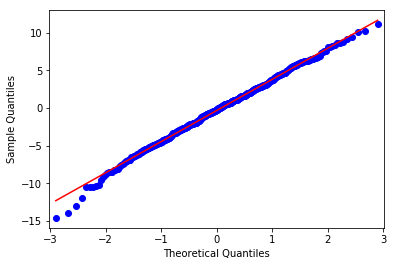

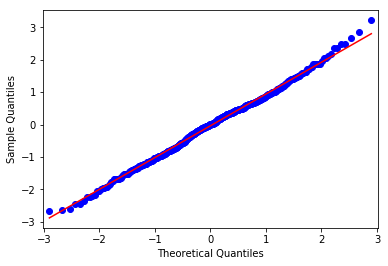

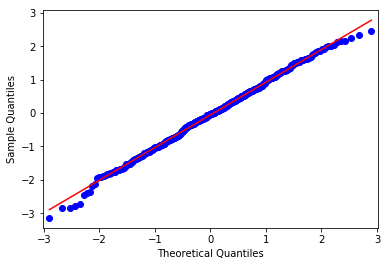

In [14]:
from statsmodels.graphics.gofplots import qqplot
for i in range(1,11):
    data=train_df[train_df['wheezy-copper-turtle-magic']==0].iloc[:,i]
    qqplot(data, line='s')
    plt.show()

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold
a=[]
for i in range(0,512):
    X=train_df[train_df['wheezy-copper-turtle-magic']==i].drop(['id','target'],axis=1).values
    Y=train_df[train_df['wheezy-copper-turtle-magic']==i]['target'].values
    sel = VarianceThreshold(threshold=1.5).fit(X)
    X = sel.transform(X)
    lr=LogisticRegression(penalty='l1')
    svm=SVC(probability=True,kernel='poly',degree=4,gamma='auto',C=10)
    gnb=GaussianNB()
    lr.fit(X,Y)
    svm.fit(X,Y)
    gnb.fit(X,Y)
    y_pred=0.2*lr.predict_proba(X)+0.5*svm.predict_proba(X)+0.3*gnb.predict_proba(X)
    auc=roc_auc_score(Y,y_pred[:,1])
    #print(auc)
    a.append(auc)
    X_test=test_df[test_df['wheezy-copper-turtle-magic']==i].drop('id',axis=1).values
    X_test = sel.transform(X_test)
    y_tpred=0.2*lr.predict_proba(X_test)+0.5*svm.predict_proba(X_test)+0.3*gnb.predict_proba(X_test)
    y_tpred=y_tpred[:,1]
    y_tpred=y_tpred.reshape(-1,1)
    #print(y_tpred.shape)
    if i!=0:
        temp=pd.DataFrame(y_tpred)
        temp['id']=test_df[test_df['wheezy-copper-turtle-magic']==i]['id'].reset_index(drop=True)
        result=pd.concat([result,temp],ignore_index=True,axis=0)
        #print(result.shape)
    else:
        result=pd.DataFrame(y_tpred)
        result['id']=test_df[test_df['wheezy-copper-turtle-magic']==i]['id'].reset_index(drop=True)

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

In [16]:
result.columns=['target','id']
result=result[['id','target']]
result.head()

,id,target
0,ca820ad57809f62eb7b4d13f5d4371a0,0.448539
1,6026b043556163039a1bfbeb10df935c,0.318468
2,0b69e1c975dedda0dbf648e37e73be66,0.475779
3,1a5af5c3638d60c7c0e2b2db9f35459e,0.706011
4,ecbd855ba0b1d8a8362c30cbfa74af24,0.944315


In [17]:
result.set_index('id',inplace=True)
result.head()

,target
id,
ca820ad57809f62eb7b4d13f5d4371a0,0.448539
6026b043556163039a1bfbeb10df935c,0.318468
0b69e1c975dedda0dbf648e37e73be66,0.475779
1a5af5c3638d60c7c0e2b2db9f35459e,0.706011
ecbd855ba0b1d8a8362c30cbfa74af24,0.944315


In [18]:
result=result.reset_index()
result.to_csv('submissions.csv',index=False)

In [19]:
result.head()

,id,target
0,ca820ad57809f62eb7b4d13f5d4371a0,0.448539
1,6026b043556163039a1bfbeb10df935c,0.318468
2,0b69e1c975dedda0dbf648e37e73be66,0.475779
3,1a5af5c3638d60c7c0e2b2db9f35459e,0.706011
4,ecbd855ba0b1d8a8362c30cbfa74af24,0.944315


In [20]:
sum(a)/len(a)

0.9999990889637084

In [21]:
a

[1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.9999371898750078,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 